In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

original_img = Image.open('abathur.jpg')

In [2]:
def img_reduction(image, factor):
    h = image.size[0]
    w = image.size[1]
    print("Original Shape : {}".format(np.array(image).shape))
    image_re = image.resize([h//factor, w//factor])
    print("Reducted Shape : {}".format(np.array(image_re).shape))
    return image_re

def img_reshape(x):
    return x.reshape(x.shape[0]*x.shape[1],x.shape[2])

def img_backshape(x, h, w):
    return x.reshape(h, w, 3)

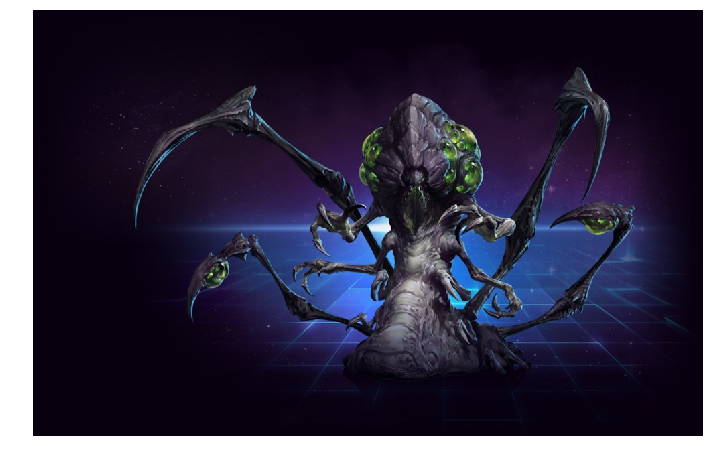

Shape : (636, 1000, 3)


In [3]:
plt.figure(figsize=(12,12))
plt.axis('off')
img = np.array(original_img)
plt.imshow(img)
plt.show()
print("Shape : {}".format(img.shape))

Original Shape : (636, 1000, 3)
Reducted Shape : (159, 250, 3)


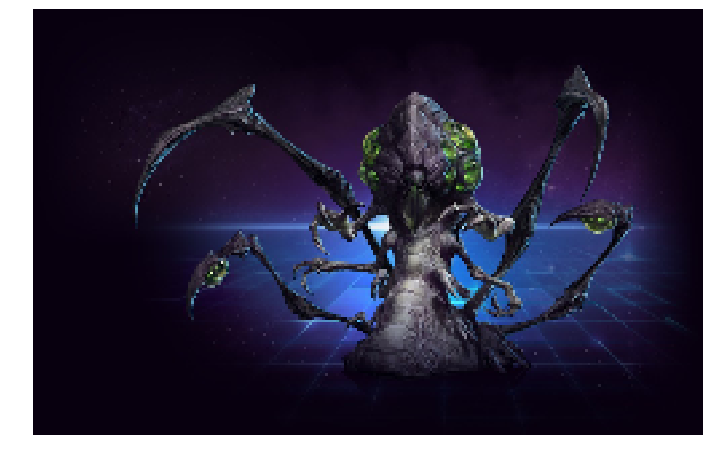

In [4]:
plt.figure(figsize=(12,12))
plt.axis('off')
img_re = img_reduction(original_img, 4)
img_re = np.array(img_re)
plt.imshow(img_re)
plt.show()

In [5]:
# A = img_reshape(img_re.copy())
# A.shape

A = img_reshape(img)
A.shape

(636000, 3)

In [59]:
k = 12
mu = np.array([np.linspace(5, 255, k),
               np.linspace(5, 255, k),
               np.linspace(5, 255, k)]).T
mu = mu.astype(int)
c = np.empty(k, dtype=object)
n_iter = 15

In [60]:
dist = np.empty([A.shape[0], k])

In [61]:
print(mu.shape)
print(dist.shape)
print(A.shape)

(12, 3)
(636000, 12)
(636000, 3)


# k-means

In [62]:
for iteration in range(n_iter):
    for i in range(k):
        dist[:,i] = np.linalg.norm(A-mu[i], 2, axis=1)
        
    min_idx_matrix = np.argmin(dist, axis=1)
    for i in range(k):
        c[i] = np.where(min_idx_matrix == i)
        mu[i] = np.mean(A[c[i]], axis=0)
        
    mu = mu.astype(int)
    print(iteration, np.mean(dist))

0 190.51275733160057
1 186.7497544043903
2 182.82448187857815
3 178.0458167341812
4 173.48837631053675
5 169.3771555528128
6 164.6666654588046
7 160.50119092710855
8 157.07534268081878
9 153.89015449520792
10 151.34114036609958
11 149.03960467572418
12 146.89489134773356
13 144.9515898310394
14 143.17440719038802


In [63]:
A_back = img_backshape(mu[min_idx_matrix], img.shape[0], img.shape[1])

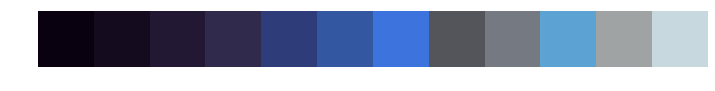

In [64]:
plt.figure(figsize=(12,6))
plt.imshow(mu.reshape(1,k,3))
plt.axis('off')
plt.show()

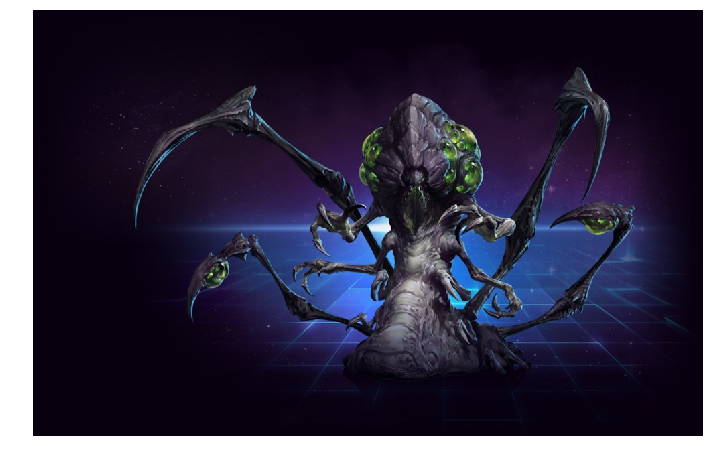

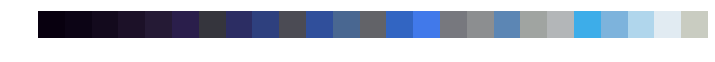

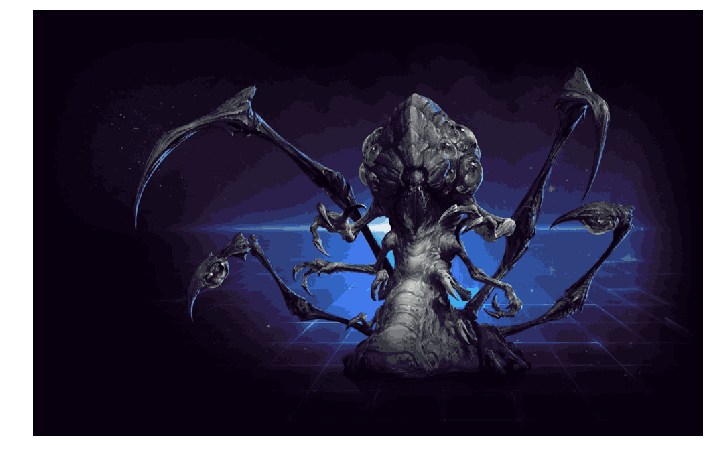

In [48]:
plt.figure(figsize=(12,12))
plt.axis('off')
plt.imshow(img)
plt.show()

plt.figure(figsize=(12,6))
plt.imshow(mu.reshape(1,k,3))
plt.axis('off')
plt.show()

plt.figure(figsize=(12,12))
plt.axis('off')
plt.imshow(A_back)
plt.show()

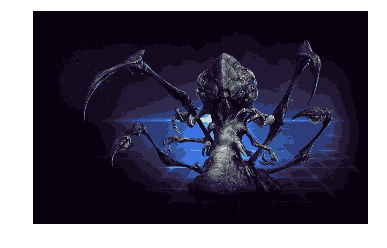

In [13]:
plt.axis('off')
plt.imshow(A_back)
plt.show()